The following analyses should be done and visualize:

* Visualize the average curvature per area in comparison to all other areas as a scatter plot
* Summary plot of average curvature per area (error bars) add info about the number of neurons used
* Same as above but per stimulus type (background vs regular objects)
* Visualize curvature trajectory on test set (single trial and on average)

* Visualize side by side the trajectory in pixel space (first two PCs) and in neural space for all areas

The following needs to be coded:
* See if there is a difference if we average responses over repeated trials and then compute the curvature




In [373]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
%matplotlib inline
%load_ext autoreload
%autoreload 2

base = !pwd
base = os.path.dirname(os.path.dirname(base[0]))
p = os.path.join(base, 'neural-straight/nstraight/')
if p not in sys.path:
    sys.path.append(p)
data_dir = os.path.join(base, 'neural-straight/data/')
if data_dir not in sys.path:
    sys.path.append(data_dir)

from data.datasets import MovieSet
from curvature.curvature_schemas import CurvaturePixels, CurvatureResponse, TemporalFilter, SpatialRescale
from data import data_schemas as data
from utils.utils import get_trial_idx, type_object_movie
from visualization.visualize import scatter_brain_areas, brain_area_curvature, histogram_object_types, scatter_pix_responses

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Comparison across visual areas Rendered stimuli

In [276]:
scan = data.MovieScan() & dict(animal_id = 16314)
rel = ((CurvatureResponse & scan) * (TemporalFilter.Butterworth() & dict(order=2))).proj('avg_curvature', 'median_curvature', 'num_neurons')
key = rel.fetch(as_dict=True)
df = pd.DataFrame(key)

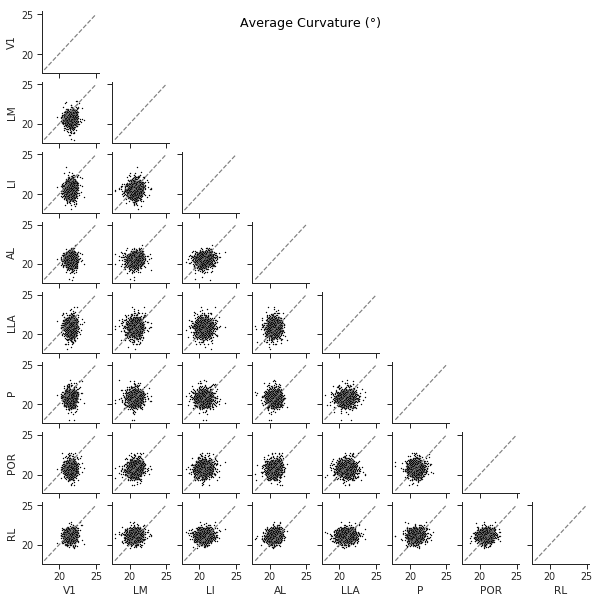

In [277]:
fig = scatter_brain_areas(df, 'average');

In [343]:
#fig.savefig('temp_vis/comparison_areas.png', bbox_inches = 'tight')

In [138]:
order_areas = ['V1', 'LM', 'LI', 'AL', 'LLA','P', 'POR','RL']

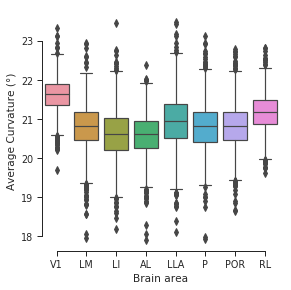

In [279]:
fig = brain_area_curvature(df, metric = 'average', kind = 'box');

In [342]:
#fig.savefig('temp_vis/comparison_areas_summary.png', bbox_inches = 'tight')

### Pixel vs Responses Rendered Stimuli

In [144]:
scan = data.MovieScan() & dict(animal_id = 16314)
relpx = ((CurvaturePixels & scan) * (TemporalFilter.Butterworth() & dict(order =2)) * SpatialRescale.No * data.ConditionClip)

In [145]:
relpx = relpx.proj('avg_pixel_curvature', 'median_pixel_curvature', 'spatial_dim', 'movie_name')

In [142]:
key = relpx.fetch(as_dict=True)
dfpx = pd.DataFrame(key)

Text(0, 0.5, 'Frequency')

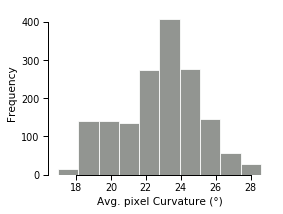

In [143]:
fig, ax = plt.subplots(1,1, figsize = (4,3))
sns.set_context('paper', font_scale=1.1)
sns.set_palette(sns.xkcd_palette(['grey', 'golden yellow']))
with sns.axes_style("ticks"):
    ax.hist(dfpx.avg_pixel_curvature.values)
sns.despine(trim=True)
ax.set_xlabel('Avg. pixel Curvature (°)')
ax.set_ylabel('Frequency')

### Pixel curvature Manolis stimuli, filtered vs Not filtered

In [257]:
scan = data.MovieScan() & dict(animal_id = 16314)
temp_restr = TemporalFilter & ((TemporalFilter.Butterworth() & dict(order =2)).proj() + TemporalFilter.No.proj())
relpx = ((CurvaturePixels & scan) * temp_restr * SpatialRescale.No * data.ConditionClip)
relpx = relpx.proj('avg_pixel_curvature', 'median_pixel_curvature', 'spatial_dim', 'movie_name', 'filter_type')
key = relpx.fetch(as_dict=True)
dfpx = pd.DataFrame(key)

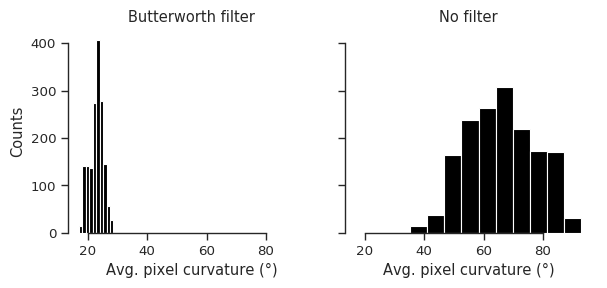

In [258]:
sns.set_context('paper', font_scale=1.1)
sns.set_palette(sns.xkcd_palette(['grey', 'golden yellow']))
with sns.axes_style("ticks"):
    g = sns.FacetGrid(dfpx, col = 'filter_type')
    g.map(plt.hist, 'avg_pixel_curvature', color = 'k')
    g.set_titles("{col_name} filter")
    g.set_xlabels('Avg. pixel curvature (°)')

g.axes[0,0].set_ylabel('Counts')
sns.despine(trim=True)
g.fig.set_dpi(100)
#g.fig.savefig('temp_vis/avg_pixel_but_no.png', bbox_inches = 'tight')

### Histogram of curvature for different types and filters

In [332]:
scan = data.MovieScan() & dict(animal_id = 16314)
temp_restr = TemporalFilter & ((TemporalFilter.Butterworth() & dict(order =2)).proj() + TemporalFilter.No.proj())
#temp_restr = TemporalFilter & (TemporalFilter.Butterworth)
relpx = ((CurvaturePixels & scan) * temp_restr * SpatialRescale.No * data.ConditionClip)
relpx = relpx.proj('avg_pixel_curvature', 'median_pixel_curvature', 'spatial_dim', 'movie_name', 'filter_type')
key = relpx.fetch(as_dict=True)
dfpx = pd.DataFrame(key)
dfpx['type_movie'] = [type_object_movie(m) for m in dfpx.movie_name]

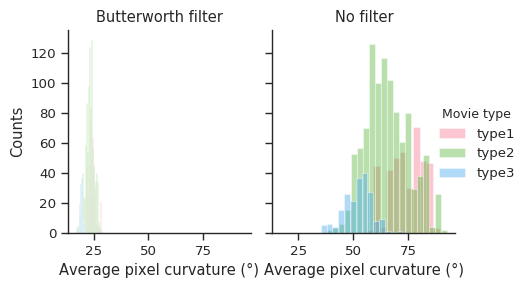

In [333]:
histogram_object_types(dfpx);

### Comparison Pixel curvature vs Brain Responses

In [334]:
scan    = data.MovieScan() & dict(animal_id  = 16314)
relpx   = ((CurvaturePixels & scan) * (TemporalFilter.Butterworth() & dict(order =2)) * SpatialRescale.No * data.ConditionClip)
relpx   = relpx.proj('avg_pixel_curvature', 'median_pixel_curvature', 'movie_name')
relresp = ((CurvatureResponse & scan) * (TemporalFilter.Butterworth() & dict(order =2)))
relresp = relresp.proj('avg_curvature', 'median_curvature')
rel_px_resp = relpx * relresp
df_px_resp  = pd.DataFrame(rel_px_resp.fetch())
df_px_resp['type_movie'] = [type_object_movie(m) for m in df_px_resp.movie_name]

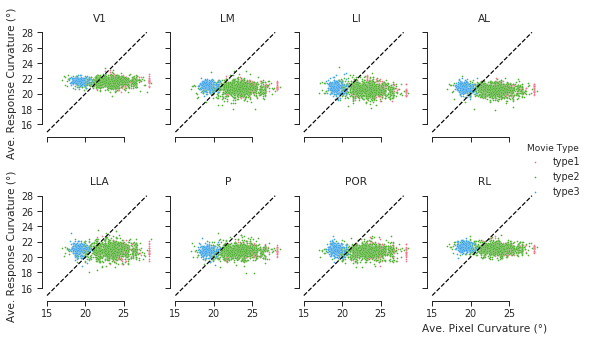

In [341]:
scatter_pix_responses(df_px_resp, 'average');

In [325]:
#g.fig.savefig('temp_vis/respvspixels_objects.png', bbox_inches='tight')

In [100]:
print(df_px_resp.avg_curvature.mean(), df_px_resp.avg_pixel_curvature.mean())

22.417462136702238 22.67571278397663


### No filtering:

In [365]:
origin_rel = (CurvatureResponse & 'animal_id < 20000').proj('avg_curvature', 'median_curvature', 'num_neurons')
conditions = data.ConditionClip.proj('movie_name') 
origin_rel & conditions

rel = origin_rel * TemporalFilter.No()
key = rel.fetch(as_dict=True)
df  = pd.DataFrame(key)

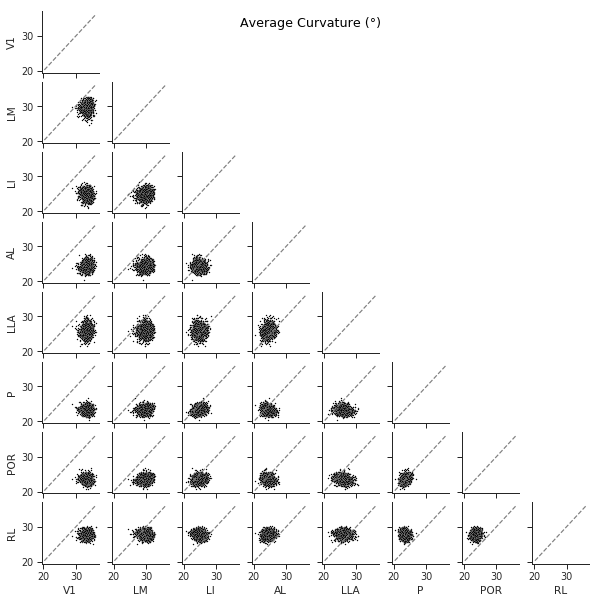

In [366]:
fig = scatter_brain_areas(df, 'average');

In [368]:
#fig.savefig('temp_vis/comparison_areas_nofilter.png', bbox_inches = 'tight')

In [372]:
#fig = brain_area_curvature(df, metric = 'average', kind = 'box');

In [371]:
#fig.savefig('temp_vis/comparison_areas_nofilter_summary.png', bbox_inches = 'tight')

### Pixels vs responses no filtering

In [363]:
relpx = (CurvaturePixels * TemporalFilter.No() * SpatialRescale.No) & 'animal_id < 20000'
relpx = relpx.proj('avg_pixel_curvature', 'median_pixel_curvature', 'spatial_dim')
key = relpx.fetch(as_dict=True)
dfpx = pd.DataFrame(key)

stim_type = '%'
#stim_type = 'obj%v5'
#stim_type = 'o%bgv6'
stim_condition = data.ConditionClip.proj('movie_name') & 'movie_name like "{}"'.format(stim_type)
rel_px_resp = (CurvaturePixels * TemporalFilter.No * SpatialRescale.No & stim_condition).proj('avg_pixel_curvature', 'median_pixel_curvature') * \
(CurvatureResponse * TemporalFilter.No & stim_condition).proj('avg_curvature', 'median_curvature')

df_px_resp = pd.DataFrame(rel_px_resp.fetch())


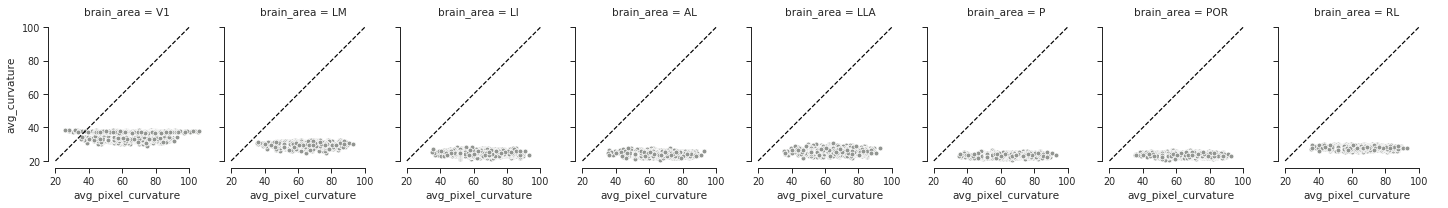

In [364]:
order_areas = ['V1', 'LM', 'LI', 'AL', 'LLA','P', 'POR','RL']
sns.set_context('paper', font_scale=1.1)
sns.set_palette(sns.xkcd_palette(['grey', 'golden yellow']))
with sns.axes_style("ticks"):
    g = sns.FacetGrid(df_px_resp, col='brain_area', aspect=1, col_order = order_areas)
    g.map(sns.scatterplot, 'avg_pixel_curvature', 'avg_curvature')
for ax in g.axes.flatten():
    ax.plot([20, 100], [20, 100], '--k')
    ax.set_aspect('equal')
    #ax.plot([15, 26], [15, 26], '--k')
    
sns.despine(trim=True)
g.fig.set_size_inches(20, 5)